In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [ ]:
import pg8000
import pandas as pd

# Connect to PostgreSQL
conn = pg8000.connect(
    host="localhost", 
    database="crime_data",  
    user="postgres",  
    password="Srinivasa@23",  
    port="5432"
)

# Create a cursor and execute query
cursor = conn.cursor()
cursor.execute("SELECT * FROM crime_data")

# Fetch and print the results
rows = cursor.fetchall()
# Get column names from the query (optional)
columns = [desc[0] for desc in cursor.description]
for row in rows:
    print(row)

cursor.close()
conn.close()
# Convert the data into a DataFrame
crime_data = pd.DataFrame(rows, columns=columns)

# Display the DataFrame (for verification)
print(df.head())

In [10]:
print(crime_data.head())

   Crime_ID Crime_Type   Location        Date   Time  Victim_Age  Suspect_Age  \
0      1001   Burglary   Shenzhen  2024-01-01  00:00          63           30   
1      1002      Fraud      Wuhan  2024-01-01  00:01          47           59   
2      1003   Burglary    Beijing  2024-01-01  00:02          57           20   
3      1004    Assault  Chongqing  2024-01-02  00:04          35           26   
4      1005    Assault   Shenzhen  2024-01-02  00:05          68           29   

  Weapon_Used   Latitude   Longitude  
0     Unknown  27.490802  103.702659  
1     Unknown  39.014286  110.838019  
2     Unknown  34.639879  117.458917  
3       Knife  31.973170  114.644498  
4         NaN  23.120373  116.131223  


C:\Users\nithy\AppData\Local\Temp\ipykernel_19064\1417683714.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crime_data.fillna(method='ffill', inplace=True)


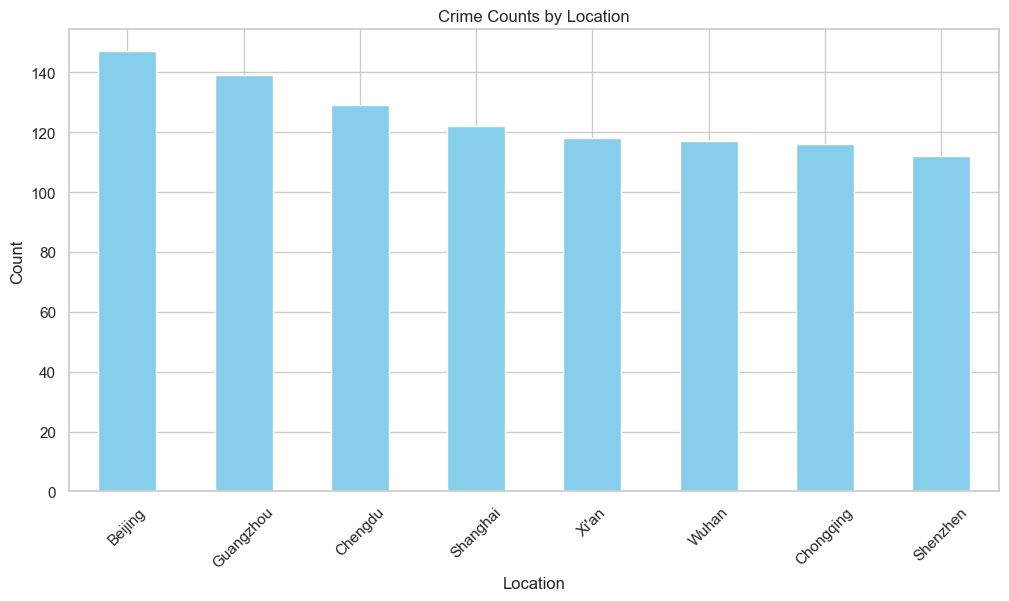

In [11]:
crime_data.fillna(method='ffill', inplace=True)


crime_data['Date'] = pd.to_datetime(crime_data['Date'])


sns.set(style='whitegrid')


location_counts = crime_data['Location'].value_counts()
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', title='Crime Counts by Location', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

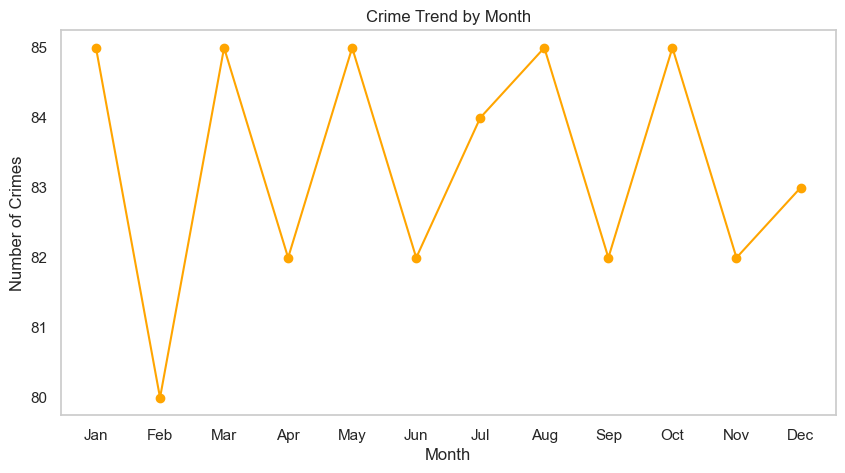

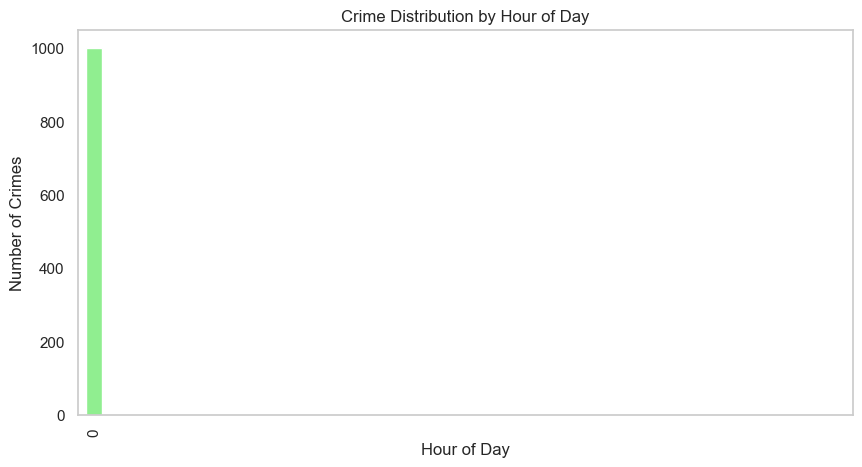

In [12]:
crime_data['Month'] = crime_data['Date'].dt.month
monthly_crime_trend = crime_data.groupby('Month')['Crime_Type'].count()
plt.figure(figsize=(10, 5))
monthly_crime_trend.plot(kind='line', marker='o', title='Crime Trend by Month', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

# 3. Time of Day Analysis
crime_data['Hour'] = crime_data['Date'].dt.hour
hourly_crime_distribution = crime_data.groupby('Hour')['Crime_Type'].count()
plt.figure(figsize=(10, 5))
hourly_crime_distribution.plot(kind='bar', title='Crime Distribution by Hour of Day', color='lightgreen')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24))
plt.grid()
plt.show()

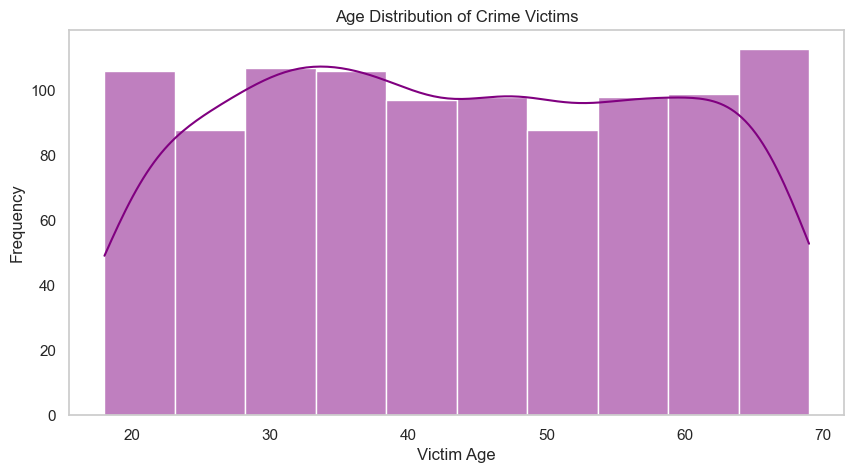

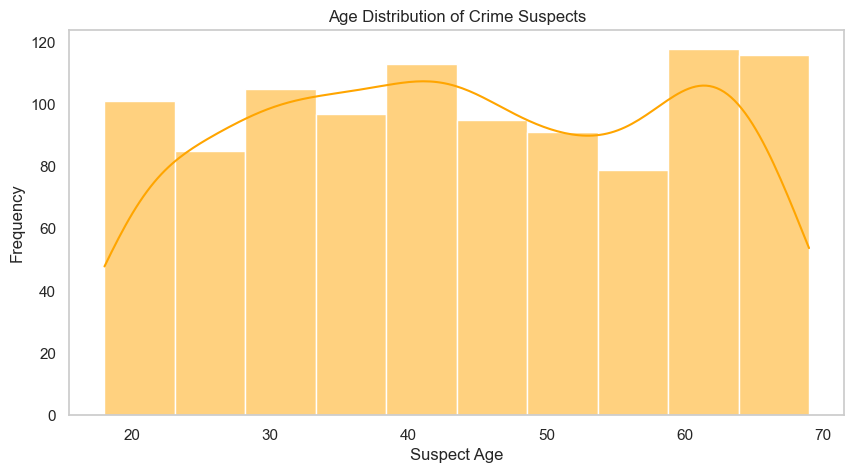

In [13]:

plt.figure(figsize=(10, 5))
sns.histplot(crime_data['Victim_Age'], bins=10, kde=True, color='purple')
plt.title('Age Distribution of Crime Victims')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(crime_data['Suspect_Age'], bins=10, kde=True, color='orange')
plt.title('Age Distribution of Crime Suspects')
plt.xlabel('Suspect Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()
